# 0. Install Dependencies

In [1]:
!pip install tensorflow==2.3.0
!pip install gym
!pip install keras
!pip install keras-rl2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement tensorflow==2.3.0 (from versions: 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.7.4, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0)
ERROR: No matching distribution found for tensorflow==2.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# 1. Test Random Environment with OpenAI Gym

In [2]:
from gym import Env
from gym.spaces import Discrete, Box, Dict
import numpy as np
import random
import gym

In [3]:
class PandoraEnv(Env):
    def __init__(self, n=6,r=np.vstack((np.zeros((1, 6)), np.ones((1, 6)))).T,box_costs=np.full_like(np.zeros(6),0.1),v0=0):
        # Actions we can take, open which box + quit now
        self.action_space = Discrete(n+1)
        # Temperature array
        # self.observation_space = Dict({
        #     'boxes': Box(low=0, high=1, shape=(n,), dtype=np.int),
        #     'max_value': Box(low=0, high=1, shape=(1,), dtype=np.float32)
        # })
        self.observation_space = Box(low=0, high=1, shape=(1, 7), dtype=np.float32)
        # Set start state (n unopened boxes)
        #self.state = np.zeros((n,))

        #Set game parameters
        self.box_costs=box_costs
        #box number
        self.maxVal = v0;
        self.maxBox = -1;
        
        #range of distribution
        self.box_ranges = r;
        #number of boxes left to open
        self.n=n;
        #opened boxes
        self.boxes_opened = np.zeros(n)
        #current step
        self.current_step=0
        #current reward
        self.reward=v0
        self.v0=v0
        
        
    def step(self, action):
        #assert self.action_space.contains(action)
        reward = 0
        observation = np.concatenate([self.boxes_opened, [self.maxVal]])
        #choose to quit
        if action == self.n:          
            done = True
            #return [self.boxes_opened,self.maxVal], reward, done, {}
            return observation, reward, done, {}
       
        #Open box
        box_index = action
        
        if self.boxes_opened[box_index]==1:
            reward=-10
        else:
            self.boxes_opened[box_index]=1
            box_value = np.random.uniform(low=self.box_ranges[box_index][0], high=self.box_ranges[box_index][1])
            reward -= self.box_costs[box_index]
            reward += max(0, box_value-self.maxVal)
            self.current_step+=1
            if self.maxVal < box_value:
                self.reward -= self.maxVal
                self.reward += box_value
                self.maxVal = box_value
                self.maxBox = action
        #check whether the step count is done
        if self.current_step >= self.n:
          done = True
        else: 
          done = False
        # observation={
        # 'boxes': self.boxes_opened,
        # 'max_value': np.array([self.maxVal], dtype=np.float32)
        # }
        observation = np.concatenate([self.boxes_opened, [self.maxVal]])
        return observation, reward, done, {}


    def render(self):
        # Implement viz
        pass
    
    def reset(self):
        self.current_step = 0
        self.boxes_opened = np.zeros(self.n)
        self.maxVal = self.v0;
        self.maxBox = -1;
        self.reward=self.v0;
        self.action_space = Discrete(self.n+1)
        # observation={
        # 'boxes': self.boxes_opened,
        # 'max_value': np.array([self.maxVal], dtype=np.float32)
        # }
        observation = np.concatenate([self.boxes_opened, [self.maxVal]])
        return observation
    

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
env = PandoraEnv()

In [5]:
env.observation_space.sample()

array([[0.35962865, 0.78463995, 0.03471754, 0.07142192, 0.5917344 ,
        0.63296837, 0.7374355 ]], dtype=float32)

In [6]:
episodes = 10
total=0
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0 
    
    while not done:
        env.render()
        action = env.action_space.sample()
        n_state, reward, done, info = env.step(action)
        score += reward
        
        print('Action:', action)
    total+=score    
    print('Episode:{} Score:{}'.format(episode, score))
print('average: {}'.format(total/episodes))

Action: 4
Action: 1
Action: 3
Action: 0
Action: 0
Action: 3
Action: 4
Action: 5
Action: 4
Action: 5
Action: 2
Episode:1 Score:-49.65006542458663
Action: 4
Action: 5
Action: 4
Action: 2
Action: 1
Action: 0
Action: 2
Action: 5
Action: 2
Action: 0
Action: 4
Action: 6
Episode:2 Score:-59.64434240879195
Action: 1
Action: 0
Action: 1
Action: 3
Action: 5
Action: 2
Action: 1
Action: 6
Episode:3 Score:-19.764129827512974
Action: 6
Episode:4 Score:0
Action: 1
Action: 5
Action: 5
Action: 1
Action: 5
Action: 6
Episode:5 Score:-29.3627155715311
Action: 4
Action: 2
Action: 5
Action: 2
Action: 4
Action: 3
Action: 6
Episode:6 Score:-19.4343563914871
Action: 3
Action: 0
Action: 3
Action: 5
Action: 0
Action: 4
Action: 0
Action: 5
Action: 1
Action: 3
Action: 5
Action: 2
Episode:7 Score:-59.62350109439957
Action: 2
Action: 1
Action: 2
Action: 4
Action: 0
Action: 4
Action: 0
Action: 2
Action: 1
Action: 5
Action: 0
Action: 0
Action: 1
Action: 6
Episode:8 Score:-79.61905252895268
Action: 4
Action: 2
Action: 

# 2. Create a Deep Learning Model with Keras

In [7]:
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam

In [8]:
from rl.agents import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
states = env.observation_space.shape
actions = env.action_space.n

In [10]:
actions

7

In [11]:

def build_model(states, actions):
    model = Sequential()    
    model.add(Flatten(input_shape=(1, 7))) #(1,n+1)
    model.add(Dense(24, activation='relu'))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(actions, activation='linear'))
    return model

In [12]:
#del model 

In [13]:
model = build_model(states, actions)

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 7)                 0         
                                                                 
 dense (Dense)               (None, 24)                192       
                                                                 
 dense_1 (Dense)             (None, 24)                600       
                                                                 
 dense_2 (Dense)             (None, 7)                 175       
                                                                 
Total params: 967
Trainable params: 967
Non-trainable params: 0
_________________________________________________________________


# 3. Testing with Build Agent with Keras-RL(DQN)


In [15]:
def build_agent(model, actions):
    policy = BoltzmannQPolicy()
    memory = SequentialMemory(limit=50000, window_length=1)
    dqn = DQNAgent(model=model, memory=memory, policy=policy, 
                  nb_actions=actions, nb_steps_warmup=10, target_model_update=1e-2)
    return dqn

In [16]:
# from keras.callbacks import TensorBoard

# # Set up a TensorBoard callback
# tensorboard_callback = TensorBoard(log_dir='./logs', histogram_freq=1)


In [17]:
class Metrics(keras.callbacks.Callback):
    def __init__(self, agent):
        keras.callbacks.Callback.__init__
        self.agent = agent
        
    def on_train_begin(self, logs={}):
        self.metrics = {key : [] for key in self.agent.metrics_names}

    def on_step_end(self, episode_step, logs):
        for ordinal, key in enumerate(self.agent.metrics_names, 0):
            self.metrics[key].append(logs.get('metrics')[ordinal])

In [117]:
dqn = build_agent(model, actions)
#dqn.compile(Adam(lr=1e-3), metrics=['mae'])
dqn.compile(Adam(lr=1e-3), metrics = ['mae'])
metrics=Metrics(dqn)
history = dqn.fit(env, nb_steps=50000, visualize=False, verbose=1,callbacks=[metrics])

Training for 50000 steps ...
Interval 1 (0 steps performed)
    1/10000 [..............................] - ETA: 3:25:45 - reward: 0.3405

/usr/local/lib/python3.9/dist-packages/rl/memory.py:37: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')
/usr/local/lib/python3.9/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 11 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)


   22/10000 [..............................] - ETA: 34:40 - reward: 0.0742

/usr/local/lib/python3.9/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 12 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
/usr/local/lib/python3.9/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 13 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
/usr/local/lib/python3.9/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 14 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
/usr/local/lib/python3.9/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 15 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
/usr/local/lib/python3.9/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 16 + 1) instead
  batch_idxs

   35/10000 [..............................] - ETA: 22:33 - reward: 0.1033

/usr/local/lib/python3.9/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 28 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
/usr/local/lib/python3.9/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 29 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
/usr/local/lib/python3.9/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 30 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
/usr/local/lib/python3.9/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 31 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)


10000/10000 [==============================] - 170s 17ms/step - reward: 0.0885
2448 episodes - episode_reward: 0.361 [-9.828, 0.898] - loss: 0.005 - mae: 2.316 - mean_q: 0.235

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 205s 20ms/step - reward: 0.0874
2459 episodes - episode_reward: 0.355 [-9.962, 0.898] - loss: 0.005 - mae: 2.320 - mean_q: 0.223

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 189s 19ms/step - reward: 0.0883
2440 episodes - episode_reward: 0.362 [-9.625, 0.899] - loss: 0.005 - mae: 2.493 - mean_q: 0.224

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 193s 19ms/step - reward: 0.0871
2440 episodes - episode_reward: 0.357 [-0.318, 0.900] - loss: 0.005 - mae: 2.580 - mean_q: 0.223

Interval 5 (40000 steps performed)
10000/10000 [==============================] - 187s 19ms/step - reward: 0.0886
done, took 944.443 seconds


In [19]:
metrics.metrics.keys()

dict_keys(['loss', 'mae', 'mean_q'])

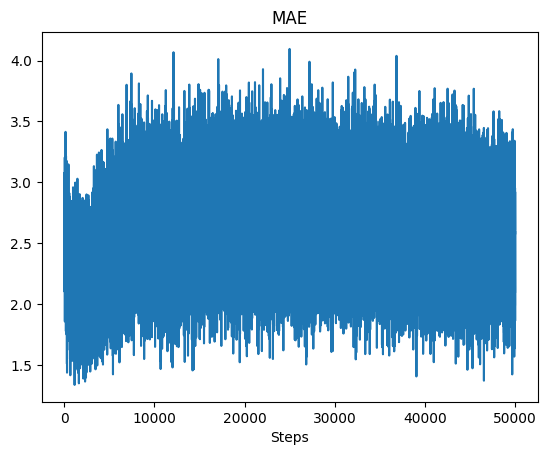

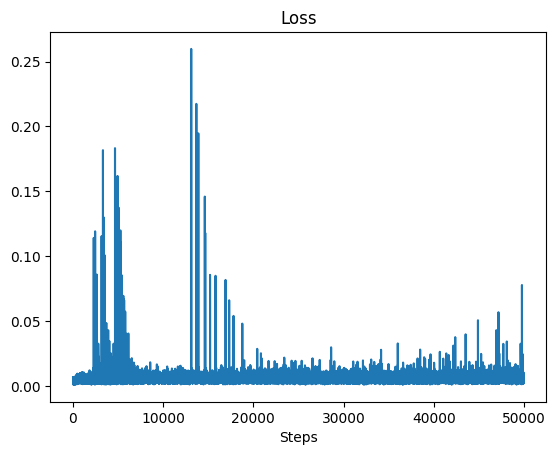

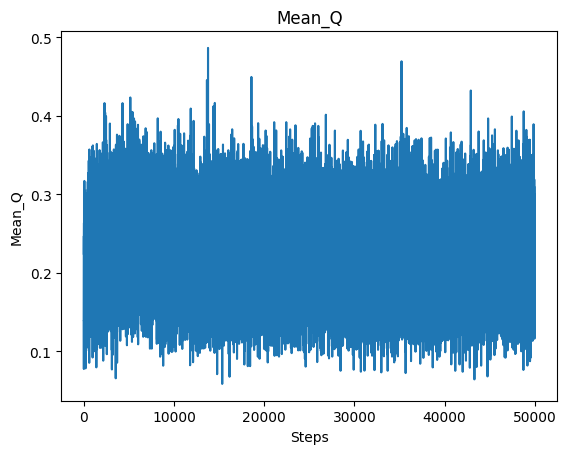

In [79]:
import matplotlib.pyplot as plt

plt.plot(metrics.metrics['mae'])
plt.title('MAE')
plt.xlabel('Steps')
#plt.ylabel('MAE')
#plt.ylim([0, 1]) # set y-axis limits
plt.show()

plt.plot(metrics.metrics['loss'])
plt.title('Loss')
plt.xlabel('Steps')
#plt.ylabel('Loss')
#plt.ylim([0, 0.02]) # set y-axis limits
plt.show()

plt.plot(metrics.metrics['mean_q'])
plt.title('Mean_Q')
plt.xlabel('Steps')
plt.ylabel('Mean_Q')
#plt.ylim([0, 1]) # set y-axis limits
plt.show()

In [ ]:
#history.history

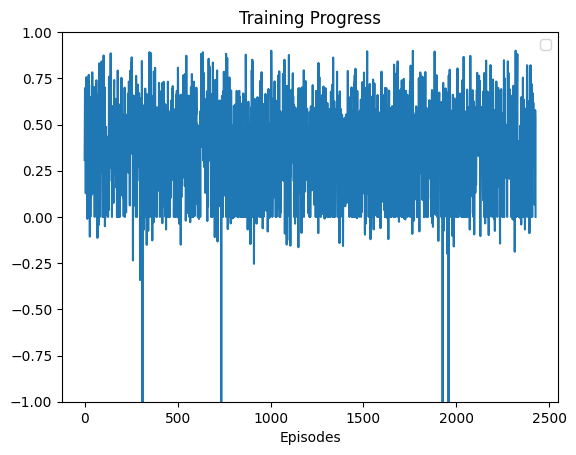

In [52]:

plt.plot(history.history['episode_reward'])
plt.ylim([-1,1])
#plt.xlim([0,500])
plt.title('Training Progress')
plt.xlabel('Episodes')
plt.legend()
plt.show()

In [89]:
#Show Q-value
np.set_printoptions(precision=4, suppress=True)
for i in range(5):
  
  state = [0, 0, 0, 1, 1, 1, 0.5+i*0.02]
  #next_action = dqn.forward(state)

  state = np.array([0,1,0,0,1,1,0.5+i*0.02])
  state = np.expand_dims(state, axis=0)  # Add an extra dimension
  state = np.expand_dims(state, axis=1)  # Add another dimension for the timesteps
  q_val = dqn.model.predict(state)
  print("x={}".format(0.5+i*0.02))
  print(q_val)
  #print(next_action)

# np.set_printoptions(precision=4, suppress=True)
# state = [0,0,0,1,1,1,0.54]
# state = np.expand_dims(state, axis=0)  # Add an extra dimension
# state = np.expand_dims(state, axis=1)  # Add another dimension for the timesteps
# q_val = dqn.model.predict(state)
# print(q_val)
# state = [0,0,0,1,1,1,0.55]
# state = np.expand_dims(state, axis=0)  # Add an extra dimension
# state = np.expand_dims(state, axis=1)  # Add another dimension for the timesteps
# q_val = dqn.model.predict(state)
# print(q_val)
# state = [0,0,0,1,1,1,0.56]
# state = np.expand_dims(state, axis=0)  # Add an extra dimension
# state = np.expand_dims(state, axis=1)  # Add another dimension for the timesteps
# q_val = dqn.model.predict(state)
# print(q_val)
# state = [0,0,0,1,1,1,0.6]
# state = np.expand_dims(state, axis=0)  # Add an extra dimension
# state = np.expand_dims(state, axis=1)  # Add another dimension for the timesteps
# q_val = dqn.model.predict(state)
# print(q_val)



x=0.5
[[-0.0059 -9.1267 -0.0291  0.0206 -8.9778 -8.3818 -0.0004]]
x=0.52
[[-0.0101 -9.1395 -0.0335  0.0127 -8.9872 -8.3918 -0.0005]]
x=0.54
[[-0.0142 -9.1523 -0.0378  0.0048 -8.9965 -8.4017 -0.0005]]
x=0.56
[[-0.0183 -9.1651 -0.0422 -0.0031 -9.0059 -8.4117 -0.0005]]
x=0.58
[[-0.0224 -9.1779 -0.0465 -0.0111 -9.0152 -8.4217 -0.0005]]


In [135]:
#scores = dqn.test(env, nb_episodes=10, visualize=False, nb_max_episode_steps=30)
scores = dqn.test(env, nb_episodes=100000, visualize=False, nb_max_episode_steps=30)
print(np.mean(scores.history['episode_reward']))

Streaming output truncated to the last 5000 lines.
Episode 95002: reward: 0.545, steps: 3
Episode 95003: reward: 0.884, steps: 2
Episode 95004: reward: 0.282, steps: 4
Episode 95005: reward: 0.682, steps: 3
Episode 95006: reward: 0.409, steps: 3
Episode 95007: reward: 0.573, steps: 4
Episode 95008: reward: 0.606, steps: 3
Episode 95009: reward: 0.566, steps: 3
Episode 95010: reward: 0.039, steps: 6
Episode 95011: reward: 0.793, steps: 2
Episode 95012: reward: 0.527, steps: 3
Episode 95013: reward: 0.878, steps: 2
Episode 95014: reward: 0.768, steps: 3
Episode 95015: reward: 0.451, steps: 3
Episode 95016: reward: 0.081, steps: 5
Episode 95017: reward: 0.853, steps: 2
Episode 95018: reward: 0.785, steps: 3
Episode 95019: reward: 0.633, steps: 3
Episode 95020: reward: 0.254, steps: 4
Episode 95021: reward: 0.323, steps: 5
Episode 95022: reward: 0.645, steps: 3
Episode 95023: reward: 0.352, steps: 5
Episode 95024: reward: 0.573, steps: 4
Episode 95025: reward: 0.501, steps: 3
Episode 95026

In [ ]:
# import os
# from google.colab import files
#files.download('/content/')
#dqn.save_weights('dqn_weights.h5f',overwrite=True)
#dqn.load_weights('dqn_weights.h5f')

In [ ]:
# episodes = 10
# for episode in range(1, episodes+1):
#     state = env.reset()
#     done = False
#     score = 0 
    
#     while not done:
#         action = dqn.predict(state)
#         n_state, reward, done, info = env.step(action)
#         state = n_state
#         score += reward
        
#     print('Episode:{} Score:{}'.format(episode, score))

#Deep SARSA training

In [90]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from rl.agents import SARSAAgent
from rl.policy import EpsGreedyQPolicy
from rl.memory import SequentialMemory



In [141]:
# define your model
modell = Sequential()
modell.add(Flatten(input_shape=(1,7)))
modell.add(Dense(50, activation='relu'))
modell.add(Dense(50, activation='relu'))
modell.add(Dense(actions, activation='linear'))

# set up optimizer and compile the model
optimizer = Adam(lr=1e-3)
modell.compile(loss='mse', optimizer=optimizer)


# set up the policy and memory
policy = EpsGreedyQPolicy(eps=0.1)

# set up the agent
sarsa = SARSAAgent(model=modell, nb_actions=env.action_space.n, policy=policy)
metricsSA=Metrics(sarsa)
sarsa.compile(optimizer=optimizer, metrics=['mae'])

# train the agent
historySA=sarsa.fit(env, nb_steps=10000, visualize=False, verbose=1,callbacks=[metricsSA])

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Training for 10000 steps ...
Interval 1 (0 steps performed)


/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


10000/10000 [==============================] - 150s 15ms/step - reward: -0.5928
done, took 149.645 seconds


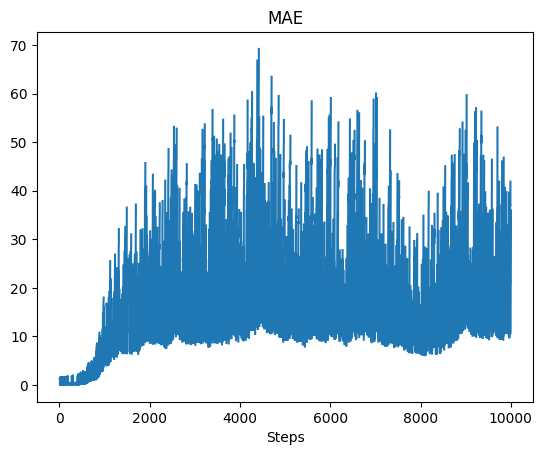

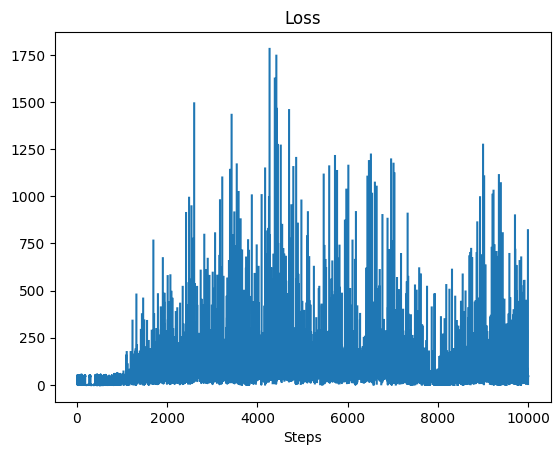

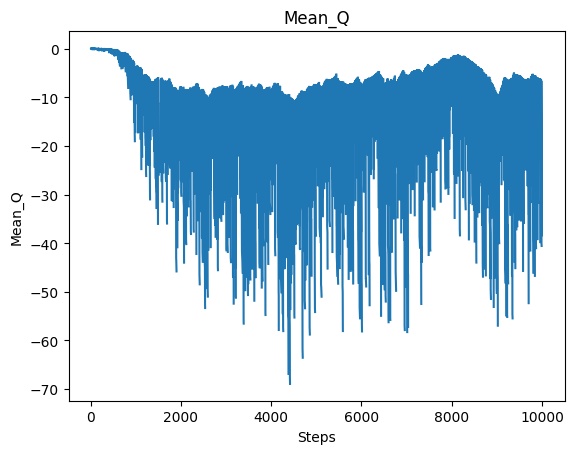

In [115]:
import matplotlib.pyplot as plt

plt.plot(metricsSA.metrics['mae'])
plt.title('MAE')
plt.xlabel('Steps')
#plt.ylabel('MAE')
#plt.ylim([0, 1]) # set y-axis limits
plt.show()

plt.plot(metricsSA.metrics['loss'])
plt.title('Loss')
plt.xlabel('Steps')
#plt.ylabel('Loss')
#plt.ylim([0, 0.02]) # set y-axis limits
plt.show()

plt.plot(metricsSA.metrics['mean_q'])
plt.title('Mean_Q')
plt.xlabel('Steps')
plt.ylabel('Mean_Q')
#plt.ylim([0, 1]) # set y-axis limits
plt.show()

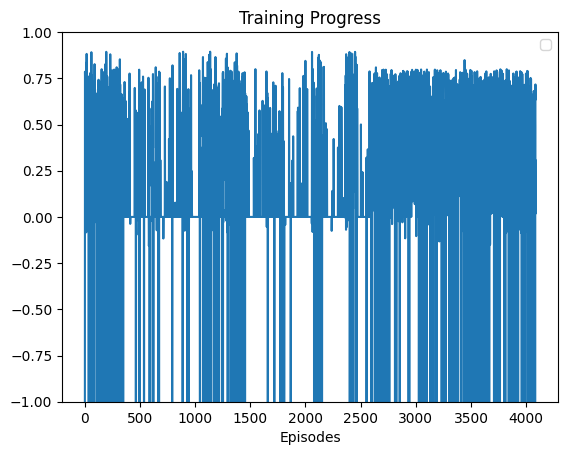

In [112]:
plt.plot(historySA.history['episode_reward'])
plt.ylim([-1,1])
#plt.xlim([0,500])
plt.title('Training Progress')
plt.xlabel('Episodes')
plt.legend()
plt.show()

In [116]:
st = sarsa.test(env, nb_episodes=1000, visualize=False)
print(np.mean(st.history['episode_reward']))

Testing for 1000 episodes ...


KeyboardInterrupt: ignored



># Performance Comparison


##1. Simulation of 100,000 runs of reservation price strategy

Simulation function with reservation price

In [120]:
def simulate(n, low, high, cost, iterations, threshold):
    """
    This function simulates the selection of random values from n boxes with uniform
    distribution of values in the range [low, high]. It returns the average reward of 
    opening boxes with the maximum value exceeding the threshold over a given number of 
    iterations.
    
    Arguments:
    n -- the number of boxes to select from
    low -- the lower bound of the range of values in each box
    high -- the upper bound of the range of values in each box
    cost -- a list of costs for opening each box
    iterations -- the number of iterations to simulate
    threshold -- the minimum value that the maximum box value must exceed for the simulation
                 to continue
    
    Returns:
    The average reward of simulations with the maximum box value exceeding the threshold.
    """
    total_reward = 0
    
    for i in range(iterations):
        # Generate values for each box
        box_values = [random.uniform(low, high) for _ in range(n)]
        
        # Initialize the opening cost and maximum value
        opening_cost = 0
        max_val = 0
        
        # Open boxes one by one until the max value exceeds the threshold
        for j in range(n):
            # Add the cost of opening this box to the total opening cost
            opening_cost += cost
            
            # Update the maximum value if the value of this box is higher
            if box_values[j] > max_val:
                max_val = box_values[j]
                
            # Stop opening boxes if the max value exceeds the threshold
            if max_val >= threshold:
                break
        
        # Calculate the reward for this iteration
        reward = max_val - opening_cost
        total_reward += reward
    
    # Calculate the average reward over all iterations
    average_reward = total_reward / iterations
    return average_reward

In [122]:
#Reservation Price Strategy Simulation
n = 6
low = 0
high = 1
cost = 0.1
iterations = 100000
threshold = 0.55
print(simulate(n,low,high,cost,iterations,threshold))
# for i in range(10):
#     best_reward = 0
#     best_threshold = 0

#     for threshold in range(0, 91):
#         threshold = threshold / 100.0
#         reward = simulate(n, low, high, cost, iterations, threshold)
        
#         if reward > best_reward:
#             best_reward = reward
#             best_threshold = threshold
            
#     print(f"Best threshold: {best_threshold}, Best reward: {best_reward}")

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.5497842975513535


In [129]:
iteration = 100000
for n in range(1, 7):
    total = 0
    for i in range (iteration):
      values = [random.uniform(0, 1) for i in range(n)]
      max_val = max(values)
      total += max_val - n*0.1
    
    print(f"For n = {n}, the maximum value is {total/iteration:.3f}")

For n = 1, the maximum value is 0.401
For n = 2, the maximum value is 0.467
For n = 3, the maximum value is 0.450
For n = 4, the maximum value is 0.400
For n = 5, the maximum value is 0.333
For n = 6, the maximum value is 0.257


In [134]:
import random
iter = 100000
total=0
for i in range (iter):
  random_numbers = [random.random() for _ in range(6)]
  max_num = max(random_numbers)
  result = max_num - 0.1
  total+=result
print(total/iter)

0.7572392052795505


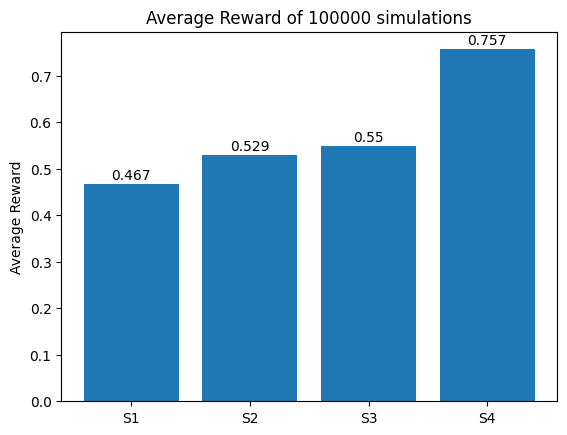

In [140]:
import matplotlib.pyplot as plt

# Define data
x = ['S1', 'S2', 'S3', 'S4']
y = [0.467, 0.529, 0.55, 0.757]

# Create bar chart
fig, ax = plt.subplots()
ax.bar(x, y)

# Add values above each bar
for i, v in enumerate(y):
    ax.text(i, v+0.01, str(v), ha='center')

# Set chart title and axis labels
ax.set_title('Average Reward of 100000 simulations')
ax.set_ylabel('Average Reward')


# Show the chart
plt.show()